In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

import pickle

### Analyzing All Chain of Thought Conditions

In [2]:
cot0 = pd.read_csv('results/chain_of_thought0/1_fewshot_results.csv')
cot1 = pd.read_csv('results/chain_of_thought1/9_fewshot_results.csv')
cot2 = pd.read_csv('results/chain_of_thought2/23_fewshot_results.csv')
cot3 = pd.read_csv('results/chain_of_thought3/23_fewshot_results.csv')
cot0_swap = pd.read_csv('results/chain_of_thought0_swap/23_fewshot_results.csv')

all_cot_logistic = pd.DataFrame()

for i, cot in enumerate([cot0, cot1, cot2, cot3, cot0_swap]):
    print(f'Chain of Thought {i}' if i!=4 else 'Chain of Thought 0 Swap')
    print(cot.columns)
    print( cot.problem.unique())
    print( cot.num_incontext.unique())
    print( cot.attempt.unique())

    # Check num_positive = num_negative on average across all problems
    display( cot.groupby(['num_incontext'])[['num_positive','num_negative']].mean())

    problem_by_num_incontext = cot.groupby(['problem','num_incontext'])[['accuracy','elapsed_time']].mean().reset_index()
    problem_by_num_incontext = problem_by_num_incontext.rename(columns = {'elapsed_time': 'mean_elapsed_time_over_10_attempts'})

    # Relevant columns
    cols = ['problem','num_incontext','attempt','accuracy']
    cols = cols if i!=4 else cols + ['num_calls_to_API']
    cot_logistic = cot[cols]
    cot_logistic['agent'] = f'Chain of Thought {i}' if i!=4 else 'Chain of Thought 0 (swapped class labels)'

    # Get first 10 attempts of each num_incontext and problem, if accidentally ran more than 10
    def max_10(group):
        return group.drop_duplicates(subset='attempt', keep='first')
    if i != 1:
        cot_logistic = cot_logistic.groupby(['problem','num_incontext']).apply(max_10).reset_index(drop = True)
    display(cot_logistic)

    # Append
    all_cot_logistic = pd.concat([all_cot_logistic, cot_logistic])

Chain of Thought 0
Index(['Unnamed: 0', 'condition', 'problem', 'num_incontext', 'attempt',
       'incontext_images', 'query_image', 'query_category', 'num_positive',
       'num_negative', 'convo', 'selected_category', 'accuracy',
       'raw_response', 'elapsed_time'],
      dtype='object')
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]


,num_positive,num_negative
num_incontext,,
1,0.513043,0.486957
2,1.034783,0.965217
3,1.549356,1.450644
4,1.991304,2.008696
5,2.513043,2.486957
6,3.034783,2.965217
7,3.282609,3.717391
8,4.030435,3.969565
9,4.586957,4.413043


/tmp/ipykernel_1496228/4209273318.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cot_logistic['agent'] = f'Chain of Thought {i}' if i!=4 else 'Chain of Thought 0 (swapped class labels)'


,problem,num_incontext,attempt,accuracy,agent
0,1,1,1,1,Chain of Thought 0
1,1,1,2,0,Chain of Thought 0
2,1,1,3,1,Chain of Thought 0
3,1,1,4,1,Chain of Thought 0
4,1,1,5,1,Chain of Thought 0
...,...,...,...,...,...
2065,23,9,6,0,Chain of Thought 0
2066,23,9,7,1,Chain of Thought 0
2067,23,9,8,1,Chain of Thought 0
2068,23,9,9,0,Chain of Thought 0


Chain of Thought 1
Index(['Unnamed: 0', 'condition', 'problem', 'num_incontext', 'attempt',
       'incontext_images', 'query_image', 'query_category', 'num_positive',
       'num_negative', 'convo', 'selected_category', 'accuracy',
       'raw_response', 'elapsed_time'],
      dtype='object')
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]


,num_positive,num_negative
num_incontext,,
1,0.513043,0.486957
2,1.034783,0.965217
3,1.556522,1.443478
4,1.991304,2.008696
5,2.513043,2.486957
6,3.034783,2.965217
7,3.282609,3.717391
8,4.030435,3.969565
9,4.586957,4.413043


/tmp/ipykernel_1496228/4209273318.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cot_logistic['agent'] = f'Chain of Thought {i}' if i!=4 else 'Chain of Thought 0 (swapped class labels)'


,problem,num_incontext,attempt,accuracy,agent
0,1,1,1,1,Chain of Thought 1
1,1,1,2,0,Chain of Thought 1
2,1,1,3,1,Chain of Thought 1
3,1,1,4,1,Chain of Thought 1
4,1,1,5,1,Chain of Thought 1
...,...,...,...,...,...
2065,9,9,5,0,Chain of Thought 1
2066,9,9,6,0,Chain of Thought 1
2067,9,9,7,0,Chain of Thought 1
2068,9,9,8,1,Chain of Thought 1


Chain of Thought 2
Index(['Unnamed: 0', 'condition', 'problem', 'num_incontext', 'attempt',
       'incontext_images', 'query_image', 'query_category', 'num_positive',
       'num_negative', 'convo', 'selected_category', 'accuracy',
       'raw_response', 'elapsed_time'],
      dtype='object')
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]


,num_positive,num_negative
num_incontext,,
1,0.513043,0.486957
2,1.034783,0.965217
3,1.556522,1.443478
4,1.991304,2.008696
5,2.513043,2.486957
6,3.034783,2.965217
7,3.282609,3.717391
8,4.030435,3.969565
9,4.586957,4.413043


/tmp/ipykernel_1496228/4209273318.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cot_logistic['agent'] = f'Chain of Thought {i}' if i!=4 else 'Chain of Thought 0 (swapped class labels)'


,problem,num_incontext,attempt,accuracy,agent
0,1,1,1,1,Chain of Thought 2
1,1,1,2,0,Chain of Thought 2
2,1,1,3,1,Chain of Thought 2
3,1,1,4,1,Chain of Thought 2
4,1,1,5,1,Chain of Thought 2
...,...,...,...,...,...
2065,23,9,6,0,Chain of Thought 2
2066,23,9,7,1,Chain of Thought 2
2067,23,9,8,1,Chain of Thought 2
2068,23,9,9,0,Chain of Thought 2


Chain of Thought 3
Index(['Unnamed: 0', 'condition', 'problem', 'num_incontext', 'attempt',
       'incontext_images', 'query_image', 'query_category', 'num_positive',
       'num_negative', 'convo', 'selected_category', 'accuracy',
       'raw_response', 'elapsed_time'],
      dtype='object')
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]


,num_positive,num_negative
num_incontext,,
1,0.513043,0.486957
2,1.034783,0.965217
3,1.556522,1.443478
4,1.991304,2.008696
5,2.513043,2.486957
6,3.034783,2.965217
7,3.282609,3.717391
8,4.030435,3.969565
9,4.586957,4.413043


/tmp/ipykernel_1496228/4209273318.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cot_logistic['agent'] = f'Chain of Thought {i}' if i!=4 else 'Chain of Thought 0 (swapped class labels)'


,problem,num_incontext,attempt,accuracy,agent
0,1,1,1,1,Chain of Thought 3
1,1,1,2,0,Chain of Thought 3
2,1,1,3,1,Chain of Thought 3
3,1,1,4,1,Chain of Thought 3
4,1,1,5,1,Chain of Thought 3
...,...,...,...,...,...
2065,23,9,6,1,Chain of Thought 3
2066,23,9,7,1,Chain of Thought 3
2067,23,9,8,1,Chain of Thought 3
2068,23,9,9,0,Chain of Thought 3


Chain of Thought 0 Swap
Index(['Unnamed: 0', 'condition', 'problem', 'num_incontext', 'attempt',
       'incontext_images', 'query_image', 'query_category', 'num_positive',
       'num_negative', 'convo', 'selected_category', 'accuracy',
       'raw_response', 'elapsed_time', 'num_calls_to_API'],
      dtype='object')
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]


,num_positive,num_negative
num_incontext,,
1,0.486957,0.513043
2,0.965217,1.034783
3,1.443478,1.556522
4,2.008696,1.991304
5,2.486957,2.513043
6,2.965217,3.034783
7,3.717391,3.282609
8,3.969565,4.030435
9,4.413043,4.586957


/tmp/ipykernel_1496228/4209273318.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cot_logistic['agent'] = f'Chain of Thought {i}' if i!=4 else 'Chain of Thought 0 (swapped class labels)'


,problem,num_incontext,attempt,accuracy,num_calls_to_API,agent
0,1,1,1,1,1,Chain of Thought 0 (swapped class labels)
1,1,1,2,0,1,Chain of Thought 0 (swapped class labels)
2,1,1,3,1,1,Chain of Thought 0 (swapped class labels)
3,1,1,4,1,1,Chain of Thought 0 (swapped class labels)
4,1,1,5,1,1,Chain of Thought 0 (swapped class labels)
...,...,...,...,...,...,...
2065,23,9,6,1,1,Chain of Thought 0 (swapped class labels)
2066,23,9,7,0,1,Chain of Thought 0 (swapped class labels)
2067,23,9,8,1,1,Chain of Thought 0 (swapped class labels)
2068,23,9,9,1,1,Chain of Thought 0 (swapped class labels)


### Human data

In [3]:
import glob

# Grab filenames
fnames = sorted(glob.glob('../../humans/data_ours/*.csv'))
print('There are', len(fnames), 'participants.')

def process(df):
    relevant_cols = [
        'Participant #', 
        'current_problem_num', 
        'accuracy', 
        'trials.thisTrialN',
        'expName'
    ]
    df = df[relevant_cols]

    # Create
    df['color'] = [expName.split('_')[0] for expName in df['expName']]
    df['display'] = [expName.split('_')[1] for expName in df['expName']]

    # Only get uncolored and sorted
    df = df[(df.color == 'uncolored') & (df.display == 'sorted')]

    # Rename for consistency
    df = df.rename(columns = {'Participant #': 'attempt', 'current_problem_num': 'problem', 'trials.thisTrialN': 'num_incontext'})

    # No nulls
    df = df[df['problem'].notnull()]

    df['num_incontext'] = df['num_incontext'] + 1

    # Make sure num_incontext is max 9
    df = df[df.num_incontext <= 9]

    # Drop cols
    df = df.drop(columns = ['color', 'display','expName'])

    # New column agent
    df['agent'] = 'Humans'

    return df

# Calculate dependent variable for each participant 
human_data = pd.DataFrame()
for fname in fnames:
    df = pd.read_csv(fname)
    human_data = pd.concat([human_data, process(df)], ignore_index=True)
display(human_data)

There are 136 participants.


/tmp/ipykernel_1496228/2667752997.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = [expName.split('_')[0] for expName in df['expName']]
/tmp/ipykernel_1496228/2667752997.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['display'] = [expName.split('_')[1] for expName in df['expName']]


/tmp/ipykernel_1496228/2667752997.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = [expName.split('_')[0] for expName in df['expName']]
/tmp/ipykernel_1496228/2667752997.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['display'] = [expName.split('_')[1] for expName in df['expName']]
/tmp/ipykernel_1496228/2667752997.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,attempt,problem,accuracy,num_incontext,agent
0,100,9.0,1.0,1.0,Humans
1,100,9.0,1.0,2.0,Humans
2,100,9.0,1.0,3.0,Humans
3,100,9.0,1.0,4.0,Humans
4,100,9.0,1.0,5.0,Humans
...,...,...,...,...,...
6718,96,20.0,1.0,5.0,Humans
6719,96,20.0,0.0,6.0,Humans
6720,96,20.0,0.0,7.0,Humans
6721,96,20.0,1.0,8.0,Humans


### Augment in-context 8 and 9 for humans and GPT (assume they are always correct)

In [4]:
def add(group):
    accuracy = 1
    
    total_incontext = 9
    start_num_incontext = len(group) + 1
    
    for num_incontext in range(start_num_incontext, total_incontext + 1):
        last_row = group.iloc[-1]  # Get the last row
        new_index = len(group)
        group.loc[new_index] = [
            last_row['attempt'],
            last_row['problem'],
            accuracy,
            num_incontext,
            'Humans'
        ]
    return group

print(len(human_data))
human_data_augmented = human_data.groupby(['attempt', 'problem']).apply(add)
print(len(human_data_augmented))

6723
7038


### Combine gpt-4-vision-preview with human data

In [5]:
#
all_logistic = pd.concat([
    all_cot_logistic, 
    human_data_augmented,
    # gpt_toc_augmented
])
all_logistic

,problem,num_incontext,attempt,accuracy,agent,num_calls_to_API
0,1.0,1.0,1,1.0,Chain of Thought 0,NaN
1,1.0,1.0,2,0.0,Chain of Thought 0,NaN
2,1.0,1.0,3,1.0,Chain of Thought 0,NaN
3,1.0,1.0,4,1.0,Chain of Thought 0,NaN
4,1.0,1.0,5,1.0,Chain of Thought 0,NaN
...,...,...,...,...,...,...
"(139, 23.0, 2245)",23.0,5.0,139,1.0,Humans,NaN
"(139, 23.0, 2246)",23.0,6.0,139,1.0,Humans,NaN
"(139, 23.0, 2247)",23.0,7.0,139,1.0,Humans,NaN
"(139, 23.0, 2248)",23.0,8.0,139,1.0,Humans,NaN


In [6]:
all_logistic.groupby(['num_incontext', 'agent']).agg(
    mean_accuracy=('accuracy', 'mean'),
    count=('accuracy', 'size')
)

mean_accuracy  count
num_incontext agent                                                          
1.0           Chain of Thought 0                              0.478261    230
              Chain of Thought 0 (swapped class labels)       0.482609    230
              Chain of Thought 1                              0.504348    230
              Chain of Thought 2                              0.491304    230
              Chain of Thought 3                              0.517391    230
              Humans                                          0.530691    782
2.0           Chain of Thought 0                              0.534783    230
              Chain of Thought 0 (swapped class labels)       0.608696    230
              Chain of Thought 1                              0.547826    230
              Chain of Thought 2                              0.530435    230
              Chain of Thought 3                              0.547826    230
              Humans                                          0.640665    782
3.0           Chain of Thought 0                              0.552174    230
              Chain of Thought 0 (swapped class labels)       0.591304    230
              Chain of Thought 1                              0.591304    230
              Chain of Thought 2                              0.552174    230
              Chain of Thought 3                              0.604348    230
              Humans                                          0.709719    782
4.0           Chain of Thought 0                              0.586957    230
              Chain of Thought 0 (swapped class labels)       0.560870    230
              Chain of Thought 1                              0.656522    230
              Chain of Thought 2                              0.573913    230
              Chain of Thought 3                              0.621739    230
              Humans                                          0.745524    782
5.0           Chain of Thought 0                              0.621739    230
              Chain of Thought 0 (swapped class labels)       0.552174    230
              Chain of Thought 1                              0.617391    230
              Chain of Thought 2                              0.626087    230
              Chain of Thought 3                              0.621739    230
              Humans                                          0.764706    782
6.0           Chain of Thought 0                              0.591304    230
              Chain of Thought 0 (swapped class labels)       0.626087    230
              Chain of Thought 1                              0.630435    230
              Chain of Thought 2                              0.565217    230
              Chain of Thought 3                              0.617391    230
              Humans                                          0.776215    782
7.0           Chain of Thought 0                              0.660870    230
              Chain of Thought 0 (swapped class labels)       0.530435    230
              Chain of Thought 1                              0.600000    230
              Chain of Thought 2                              0.652174    230
              Chain of Thought 3                              0.608696    230
              Humans                                          0.791560    782
8.0           Chain of Thought 0                              0.656522    230
              Chain of Thought 0 (swapped class labels)       0.586957    230
              Chain of Thought 1                              0.647826    230
              Chain of Thought 2                              0.647826    230
              Chain of Thought 3                              0.647826    230
              Humans                                          0.819693    782
9.0           Chain of Thought 0                              0.613043    230
              Chain of Thought 0 (swapped class labels)       0.639130    230
 

/tmp/ipykernel_1496228/1794780782.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(['num_incontext', 'agent']).agg(


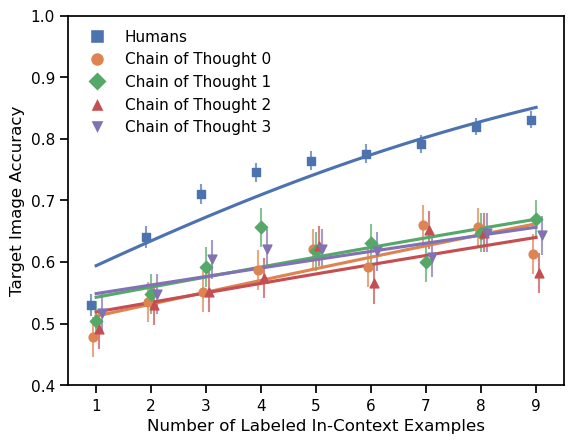

In [7]:
# Everything except CoT 0 Swap
all_logistic_noswap = all_logistic[all_logistic.agent != 'Chain of Thought 0 Swap']

custom_order = [
    'Humans',
    'Chain of Thought 0',
    'Chain of Thought 1',
    'Chain of Thought 2',
    'Chain of Thought 3'
]
all_logistic_noswap['agent'] = pd.Categorical(
    all_logistic_noswap['agent'],
    categories=custom_order,
    ordered=True
)


from statsmodels.stats.proportion import proportion_confint
from matplotlib.lines import Line2D

# Function to calculate mean accuracy and binomial confidence intervals
def summarize_data(df):
    summary = df.groupby(['num_incontext', 'agent']).agg(
        mean_accuracy=('accuracy', 'mean'),
        count=('accuracy', 'size')
    ).reset_index()

    # Calculate standard error for binomial distribution
    summary['standard_error'] = np.sqrt(summary['mean_accuracy'] * (1 - summary['mean_accuracy']) / summary['count'])
    return summary

# Calculate summarized data
summary = summarize_data(all_logistic_noswap)

# Plotting
plt.figure(figsize = (6.4, 4.8))
sns.set_context('notebook')

# Unique agents and their properties
agents = summary['agent'].unique()
num_agents = len(agents)
colors = sns.color_palette('deep')[:num_agents]
markers = ['s', 'o', 'D', '^', 'v', '*']
offsets = np.linspace(-0.1, 0.1, num_agents)  # Offsets to separate error bars

# Custom legend handles
handles = []

for agent, color, marker, offset in zip(agents, colors, markers, offsets):
    # Subset summary for the agent
    subset = summary[summary['agent'] == agent]
    
    # Apply offset to num_incontext for plotting both points and error bars
    adjusted_x = subset['num_incontext'] + offset
    
    # Plot points with offset
    plt.scatter(adjusted_x, subset['mean_accuracy'], color=color, marker=marker, zorder=3, s=40)
    
    # Plot logistic regression without offset
    sns.regplot(
        x='num_incontext', 
        y='mean_accuracy', 
        data=subset, 
        logistic=True, 
        ci = None,
        scatter=False, 
        color=color, 
        line_kws={'zorder':2},
        label= f'{agent}',
    ).set(
        # title = 'gpt-vision-preview',
        # title = 'gpt-vision-preview / High Image Detail',
        ylim = (0.4, 1),
        xticks = range(1,10)
    )
    
    # Plot error bars with the same offset and specified capsize
    plt.errorbar(adjusted_x, subset['mean_accuracy'], 
                 yerr=subset['standard_error'], 
                 fmt='none', ecolor=color, alpha=0.7, zorder=1, label='_no_legend_')
    
    # Create custom legend handle
    handles.append(Line2D([0], [0], marker=marker, color='w', label=agent,
                          markerfacecolor=color, markersize=10))

plt.xlabel('Number of Labeled In-Context Examples')
plt.ylabel('Target Image Accuracy')
plt.legend(handles = handles).get_frame().set_linewidth(0.0)
plt.show()

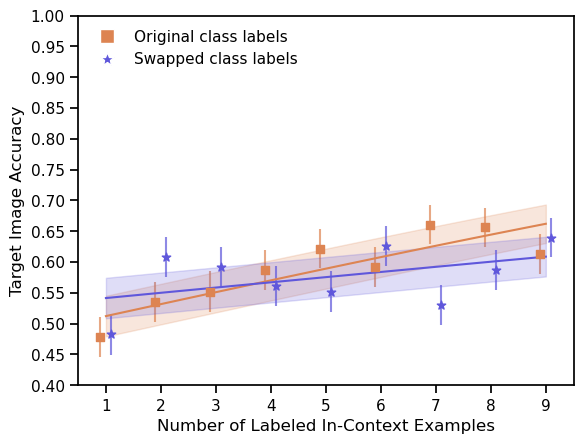

In [13]:
# Chain of Thought 0 Swap

# Everything except CoT 0 Swap
all_logistic_swap = all_logistic[all_logistic.agent.isin(['Chain of Thought 0 (swapped class labels)', 'Chain of Thought 0'])]


# Function to calculate mean accuracy and binomial confidence intervals
def summarize_data(df):
    summary = df.groupby(['num_incontext', 'agent']).agg(
        mean_accuracy=('accuracy', 'mean'),
        count=('accuracy', 'size')
    ).reset_index()

    # Calculate standard error for binomial distribution
    summary['standard_error'] = np.sqrt(summary['mean_accuracy'] * (1 - summary['mean_accuracy']) / summary['count'])
    return summary

# Calculate summarized data
summary = summarize_data(all_logistic_swap)

# Plotting
plt.figure(figsize = (6.4, 4.8))
sns.set_context('notebook')

# Unique agents and their properties
agents = summary['agent'].unique()
num_agents = len(agents)
colors = [sns.color_palette('deep')[1], sns.color_palette('hls')[4]]
markers = ['s', '*']
offsets = np.linspace(-0.1, 0.1, num_agents)  # Offsets to separate error bars

# Custom legend handles
handles = []

for agent, color, marker, offset in zip(agents, colors, markers, offsets):
    
    # Subset summary for the agent
    subset = summary[summary.agent == agent]
    
    # Apply offset to num_incontext for plotting both points and error bars
    adjusted_x = subset['num_incontext'] + offset
    
    # Plot points with offset
    plt.scatter(adjusted_x, subset['mean_accuracy'], color=color, marker=marker, zorder=3, s=40)
    
    # Fit logistic regression manually
    X = sm.add_constant(subset['num_incontext'])
    y = subset['mean_accuracy']
    logit_model = sm.Logit(y, X).fit(disp=False)
    
    # Generate predictions and standard errors
    x_pred = np.linspace(subset['num_incontext'].min(), subset['num_incontext'].max(), 100)
    X_pred = sm.add_constant(x_pred)
    y_pred = logit_model.predict(X_pred)
    
    # Calculate standard errors based on logistic regression prediction
    se = np.sqrt(y_pred * (1 - y_pred) / subset['count'].mean())  # Adjust SE calculation dynamically
    
    # Plot logistic regression line (smooth)
    plt.plot(x_pred, y_pred, color=color, zorder=2)
    plt.ylim( (0.4, 1))
    plt.xticks( range(1,10))
    plt.yticks( np.arange(0.4, 1.05, 0.05))
    
    # Plot standard error bands (smooth)
    plt.fill_between(x_pred, y_pred - se, y_pred + se, color=color, alpha=0.2, zorder=1)
    
    # Plot error bars with the same offset and specified capsize
    plt.errorbar(adjusted_x, subset['mean_accuracy'], 
                 yerr=subset['standard_error'], 
                 fmt='none', ecolor=color, alpha=0.7, zorder=1, label='_no_legend_')
    
    # Create custom legend handle
    handles.append(Line2D([0], [0], marker=marker, color='w', label=agent,
                          markerfacecolor=color, markersize=10))

plt.xlabel('Number of Labeled In-Context Examples')
plt.ylabel('Target Image Accuracy')
plt.legend(handles = handles, labels = ['Original class labels', 'Swapped class labels'], loc='upper left').get_frame().set_linewidth(0.0)
plt.show()

In [29]:
# Check num calls to API
all_logistic[all_logistic.agent == 'Chain of Thought 0 (swapped class labels)'].groupby('num_calls_to_API').count()

,problem,num_incontext,attempt,accuracy,agent
num_calls_to_API,,,,,
1.0,2068,2068,2068,2068,2068
2.0,2,2,2,2,2


In [30]:
# Save data
all_logistic.to_csv('analysis/svrt_fewshot_gpt-4-vision-preview.csv')